# Вариант задания: Прогнозирование цен на автомобили
### Бизнес-цели:
Повышение эффективности ценообразования на вторичном рынке автомобилей:
Цель: Разработать модель машинного обучения, которая позволит точно прогнозировать рыночную стоимость автомобилей на вторичном рынке.
Ключевые показатели успеха (KPI):
Точность прогнозирования цены (например, RMSE, MAE).
Сокращение времени на оценку стоимости автомобиля.
Увеличение количества продаж за счет более конкурентоспособных цен.
Оптимизация рекламных бюджетов для онлайн-площадок по продаже автомобилей:
Цель: Использовать прогнозы цен на автомобили для оптимизации таргетинга рекламы и повышения конверсии на онлайн-площадках.
Ключевые показатели успеха (KPI):
Увеличение CTR (Click-Through Rate) рекламных объявлений.
Повышение конверсии (процент пользователей, совершивших покупку после клика на рекламу).
Снижение стоимости привлечения клиента (CPA).
### Цели технического проекта:
Для бизнес-цели 1:
Сбор и подготовка данных:
Очистка данных от пропусков, выбросов и дубликатов.
Преобразование категориальных переменных в числовые.
Разделение данных на обучающую и тестовую выборки.
Разработка и обучение модели:
Исследование различных алгоритмов машинного обучения (линейная регрессия, деревья решений, случайный лес и т.д.).
Обучение моделей на обучающей выборке.
Оценка качества моделей на тестовой выборке с помощью метрик RMSE, MAE и др.
Развертывание модели:
Интеграция модели в существующую систему или разработка нового API для доступа к прогнозам.
Создание веб-интерфейса или мобильного приложения для удобного использования модели.
Для бизнес-цели 2:
Анализ данных о пользователях и поведении:
Анализ данных о просмотрах, кликах и покупках на онлайн-площадке.
Определение сегментов пользователей с разным уровнем интереса к покупке автомобилей.
Разработка рекомендательной системы:
Создание модели, которая будет рекомендовать пользователям автомобили, соответствующие их предпочтениям и бюджету.
Интеграция рекомендательной системы в рекламные кампании.
Оптимизация таргетинга рекламы:
Использование прогнозов цен на автомобили для более точного таргетинга рекламы на пользователей, готовых к покупке.
Тестирование различных стратегий таргетинга и оценка их эффективности.

In [3]:
import pandas as pn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
df = pn.read_csv(".//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


Разделим на 3 выборки


In [7]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 12311
Размер контрольной выборки: 3078
Размер тестовой выборки: 3848


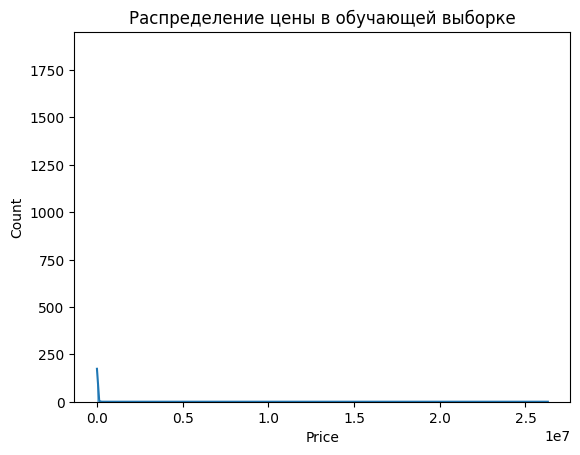

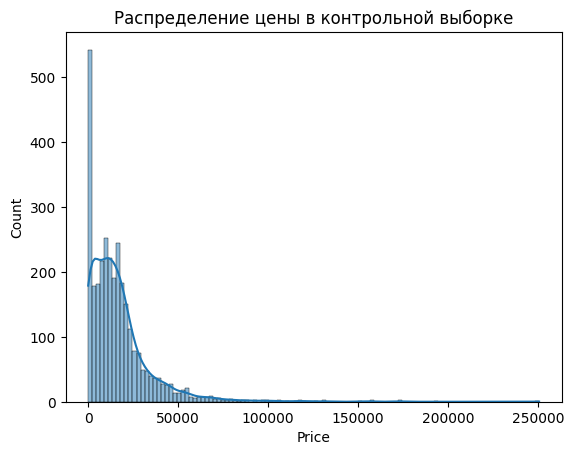

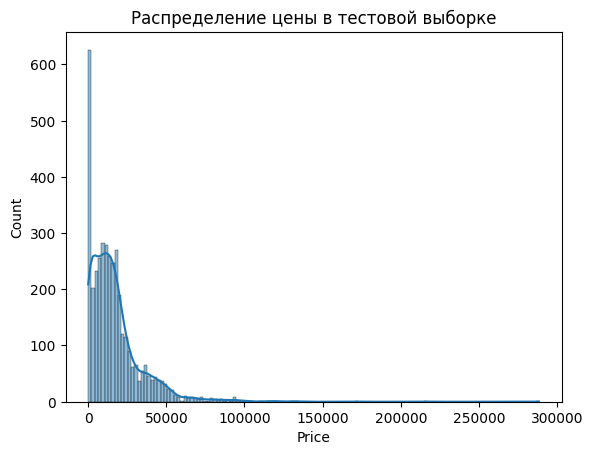

In [8]:
# Пример оценки сбалансированности целевой переменной (цена автомобиля)
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения цены в обучающей выборке
sns.histplot(train_data['Price'], kde=True)
plt.title('Распределение цены в обучающей выборке')
plt.show()

# Гистограмма распределения цены в контрольной выборке
sns.histplot(val_data['Price'], kde=True)
plt.title('Распределение цены в контрольной выборке')
plt.show()

# Гистограмма распределения цены в тестовой выборке
sns.histplot(test_data['Price'], kde=True)
plt.title('Распределение цены в тестовой выборке')
plt.show()

## Процесс конструирования признаков
Задача 1: Прогнозирование цен на автомобили
Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования рыночной стоимости автомобилей.

Задача 2: Оптимизация рекламных бюджетов
Цель технического проекта: Использование прогнозов цен на автомобили для оптимизации таргетинга рекламы и повышения конверсии на онлайн-площадках.


### Унитарное кодирование категориальных признаков (one-hot encoding)

One-hot encoding: Преобразование категориальных признаков в бинарные векторы.

In [15]:
import pandas as pd

# Пример категориальных признаков
categorical_features = ['Model', 'Category', 'Fuel type', 'Gear box type', 'Leather interior']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

             ID  Price  Levy Manufacturer  Prod. year Engine volume  \
3438   45793776  13485   781   VOLKSWAGEN        2012           2.5   
3185   45760664    314   781       SUBARU        2012           2.5   
5529   45777845   5645  5908          BMW        1999           2.5   
7891   45651201   7997  1850        LEXUS        2008           3.5   
12167  45798755  15681   765   VOLKSWAGEN        2015             2   
...         ...    ...   ...          ...         ...           ...   
2750   45656065    941  1055        LEXUS        2013           3.5   
17390  45785069  12000     -         FORD        1998           2.5   
5563   45815001    941   777       TOYOTA        2014           2.5   
3813   45809829  54850   831        HONDA        2018           1.5   
6041   45397141   9095     -         FORD        2003           1.7   

         Mileage  Cylinders Drive wheels   Doors  ... Fuel type_Hybrid  \
3438   160000 km        4.0         Rear  04-May  ...            False   

### Дискретизация числовых признаков 
это процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины). Этот процесс может быть полезен по нескольким причинам

In [19]:
# Пример дискретизации признака 'year'
train_data_encoded['Year bin'] = pd.cut(train_data_encoded['Prod. year'], bins=5, labels=False)
val_data_encoded['Year bin'] = pd.cut(val_data_encoded['Prod. year'], bins=5, labels=False)
test_data_encoded['Year bin'] = pd.cut(test_data_encoded['Prod. year'], bins=5, labels=False)

             ID  Price  Levy   Manufacturer  Prod. year Engine volume  \
736    45753963  27284   259      CHEVROLET        2014           1.4   
8674   45786053  10349     -  MERCEDES-BENZ        1997     2.9 Turbo   
5971   45757478  40769     -  MERCEDES-BENZ        1996           1.8   
1957   45732345  38737   639        HYUNDAI        2014             2   
11075  45729790  42102   831      SSANGYONG        2017           1.6   
...         ...    ...   ...            ...         ...           ...   
12026  45786994  12231   650      CHEVROLET        2016     1.4 Turbo   
17893  45756187  15681     -           FORD        2003     2.4 Turbo   
5339   45769967    314  2410  MERCEDES-BENZ        2010           6.2   
11859  45801865  14069   687        HYUNDAI        2010           1.6   
9276   45803366  15681   891        HYUNDAI        2016             2   

         Mileage  Cylinders Drive wheels   Doors  ... Fuel type_LPG  \
736     65000 km        4.0        Front  04-May  ..

### Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. Например, для данных о продаже автомобилей можно создать признак "возраст автомобиля" как разницу между текущим годом и годом выпуска.

In [21]:
# Пример синтеза признака "возраст автомобиля"
train_data_encoded['Age'] = 2024 - train_data_encoded['Prod. year']
val_data_encoded['Age'] = 2024 - val_data_encoded['Prod. year']
test_data_encoded['Age'] = 2024 - test_data_encoded['Prod. year']

             ID  Price  Levy Manufacturer  Prod. year Engine volume  \
3438   45793776  13485   781   VOLKSWAGEN        2012           2.5   
3185   45760664    314   781       SUBARU        2012           2.5   
5529   45777845   5645  5908          BMW        1999           2.5   
7891   45651201   7997  1850        LEXUS        2008           3.5   
12167  45798755  15681   765   VOLKSWAGEN        2015             2   
...         ...    ...   ...          ...         ...           ...   
2750   45656065    941  1055        LEXUS        2013           3.5   
17390  45785069  12000     -         FORD        1998           2.5   
5563   45815001    941   777       TOYOTA        2014           2.5   
3813   45809829  54850   831        HONDA        2018           1.5   
6041   45397141   9095     -         FORD        2003           1.7   

         Mileage  Cylinders Drive wheels   Doors  ... Fuel type_Petrol  \
3438   160000 km        4.0         Rear  04-May  ...             True   

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['Airbags', 'Age']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

### Конструирование признаков с применением фреймворка Featuretools

In [25]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='car_data')
es = es.entity_from_dataframe(entity_id='cars', dataframe=train_data_encoded, index='id')

# Определение связей между сущностями (если есть)
# es = es.add_relationship(...)

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity='cars', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

ModuleNotFoundError: No module named 'pkg_resources'